<a href="https://colab.research.google.com/github/manassanant132/02_Maching_Learing_Pipeline/blob/main/02_Machine_Learning_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0.MOUNT

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.DATA PREPARATION

In [31]:
import tensorflow as tf 
import time
import numpy as np
import matplotlib.pyplot as plt

import plotly
import plotly.graph_objs as go

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle as p

to_categorical = tf.keras.utils.to_categorical  #เอา tenflow แยกประเภท
mnist = tf.keras.datasets.mnist  #download data set ตัวเลข(mnist)
load_model = tf.keras.models.load_model  
model_from_json = tf.keras.models.model_from_json  # model -> json

In [93]:
batch_size = 20
num_classes = 10
epochs =20

img_rows,img_cols = 28,28

In [94]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [95]:
temp_x_test = x_test

x_train = x_train.reshape(x_train.shape[0], img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
input_shape = (img_rows,img_cols,1)

x_train = x_train.astype('float32')
x_test=x_test.astype('float32')
x_train /=255
x_test /=255
print('x_train.shape:', x_train.shape)
print('x_test.shape:', x_test.shape)
print(x_train.min(), x_train.max())

x_train.shape: (60000, 28, 28, 1)
x_test.shape: (10000, 28, 28, 1)
0.0 1.0


In [96]:
y_train= to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

# DEFINE MODEL

In [97]:
#Feature Extraction
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))

#Image Classification
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(num_classes,activation='softmax'))

In [98]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_23 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_24 (Conv2D)          (None, 22, 22, 128)       73856     
                                                                 
 dropout_22 (Dropout)        (None, 22, 22, 128)       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 20, 20, 64)        73792     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                      

In [99]:
start = time.time()

his = model.fit(x_train,y_train, batch_size=batch_size , epochs=epochs ,verbose=1, validation_data=(x_test,y_test))

done = time.time()
print(done-start)

Epoch 1/20
3000/3000 [==============================] - 20s 6ms/step - loss: 0.1680 - accuracy: 0.9496 - val_loss: 0.0595 - val_accuracy: 0.9830
Epoch 2/20
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0734 - accuracy: 0.9790 - val_loss: 0.0361 - val_accuracy: 0.9899
Epoch 3/20
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0574 - accuracy: 0.9840 - val_loss: 0.0303 - val_accuracy: 0.9913
Epoch 4/20
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0451 - accuracy: 0.9871 - val_loss: 0.0262 - val_accuracy: 0.9916
Epoch 5/20
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0400 - accuracy: 0.9884 - val_loss: 0.0275 - val_accuracy: 0.9924
Epoch 6/20
3000/3000 [==============================] - 20s 7ms/step - loss: 0.0350 - accuracy: 0.9898 - val_loss: 0.0264 - val_accuracy: 0.9925
Epoch 7/20
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0353 - accuracy: 0.9901 - val_loss: 0.0251 - val_ac

# Save Model

## 1.save history

In [100]:

filepath_history_model = 'history_model'

with open(filepath_history_model,'wb') as file :
  p.dump(his.history,file)

#https://www.programiz.com/python-programming/file-operation

In [101]:
filepath='model.h5'
model.save(filepath)

In [102]:
filepath_model='model.json'
filepath_weights = 'weights_model.h5'

model_json = model.to_json()
with open(filepath_model,"w") as json_file :
  json_file.write(model_json)
  model.save_weights(filepath_weights)

In [103]:
model_json

'{"class_name": "Sequential", "config": {"name": "sequential_6", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 28, 28, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_22_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_22", "trainable": true, "batch_input_shape": [null, 28, 28, 1], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Conv2D", "config": {"name": "conv2d_23", "trainable": true, "dtype": "float32", "filters": 64, "kernel_size": [3, 3], "strides": [1, 1], "paddin

#STEP 6 LOAD MODEL

In [104]:
with open(filepath_history_model,'rb') as file :
  his = p.load(file)

In [105]:
h1=go.Scatter(y=his['loss'], mode="lines" , line=dict(width=2,color='blue'),name="loss")
h2=go.Scatter(y=his['val_loss'],mode="lines",line=dict(width=2,color='red'),name="val_loss")
data = [h1,h2]
layout1 = go.Layout(title="Loss",xaxis=dict(title='epochs'),yaxis=dict(title=''))
figl=go.Figure(data,layout=layout1)
plotly.offline.iplot(figl,filename="testMNIST")

In [106]:
h1=go.Scatter(y=his['accuracy'], mode="lines" , line=dict(width=2,color='blue'),name="Accuracy")
h2=go.Scatter(y=his['val_accuracy'],mode="lines",line=dict(width=2,color='red'),name="val_Accuracy")
data = [h1,h2]
layout1 = go.Layout(title="Accuracy",xaxis=dict(title='epochs'),yaxis=dict(title='Accuracy'))
figl=go.Figure(data,layout=layout1)
plotly.offline.iplot(figl,filename="testMNIST")

In [64]:
predict_model = load_model(filepath)
predict_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 22, 22, 128)       73856     
                                                                 
 dropout_10 (Dropout)        (None, 22, 22, 128)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 20, 20, 64)        73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                      

In [65]:
with open(filepath_model,'r') as f :
  loaded_model_json = f.read()
  predict_model = model_from_json(loaded_model_json)
  predict_model.load_weights(filepath_weights)
predict_model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

predict_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 22, 22, 128)       73856     
                                                                 
 dropout_10 (Dropout)        (None, 22, 22, 128)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 20, 20, 64)        73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                      

#STEP 7 Prediction


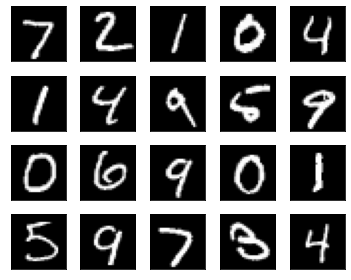

In [66]:
plt.figure(figsize=(5,4))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(temp_x_test[i],cmap='gray')
  plt.xticks([])
  plt.yticks([])
plt.tight_layout()
plt.savefig('test_mnist.png',dpi=300)

In [67]:
result = predict_model.predict(x_test[:1])
result = np.argmax(result,axis=-1)

print(result)

[7]


#STEP 8 EVALUATION

In [68]:
score = predict_model.evaluate(x_test,y_test,verbose=0)
print('test loss;',score[0])
print('test accuracy',score[1])

test loss; 0.025900159031152725
test accuracy 0.993399977684021


In [69]:
predicted_classes=predict_model.predict(x_test)
predicted_classes=np.argmax(predicted_classes,axis=-1)
y_true=np.argmax(y_test,axis=-1)
correct=np.nonzero(predicted_classes == y_true)[0]
incorrect = np.nonzero(predicted_classes != y_true)[0]

print("correct predicted classes:",correct.shape[0])
print("incorrect predicted classes:",incorrect.shape[0])

correct predicted classes: 9934
incorrect predicted classes: 66


In [70]:
confusion_matrix(y_true,predicted_classes)

array([[ 979,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [   1, 1133,    0,    0,    0,    0,    0,    1,    0,    0],
       [   1,    1, 1020,    2,    0,    0,    0,    8,    0,    0],
       [   0,    0,    0, 1008,    0,    1,    0,    0,    1,    0],
       [   0,    0,    0,    0,  978,    0,    0,    0,    0,    4],
       [   0,    0,    0,    6,    0,  883,    1,    1,    1,    0],
       [   4,    3,    0,    0,    1,    2,  945,    0,    3,    0],
       [   0,    2,    0,    0,    0,    0,    0, 1025,    1,    0],
       [   3,    1,    0,    1,    0,    1,    0,    1,  965,    2],
       [   0,    1,    0,    0,    4,    1,    0,    4,    1,  998]])

In [71]:
labels = {0:"zero",1:"One",2:"Two",3:"Three",4:"Four",5:"Five",6:"Six",7:"Seven",8:"Eight",9:"Nine"}

target_names = ["Class {} ({}) :".format(i,labels[i])for i in range (num_classes)]
print(classification_report(y_true,predicted_classes,target_names=target_names,digits=4))

                   precision    recall  f1-score   support

 Class 0 (zero) :     0.9909    0.9990    0.9949       980
  Class 1 (One) :     0.9930    0.9982    0.9956      1135
  Class 2 (Two) :     1.0000    0.9884    0.9942      1032
Class 3 (Three) :     0.9912    0.9980    0.9946      1010
 Class 4 (Four) :     0.9949    0.9959    0.9954       982
 Class 5 (Five) :     0.9944    0.9899    0.9921       892
  Class 6 (Six) :     0.9989    0.9864    0.9926       958
Class 7 (Seven) :     0.9846    0.9971    0.9908      1028
Class 8 (Eight) :     0.9928    0.9908    0.9918       974
 Class 9 (Nine) :     0.9940    0.9891    0.9916      1009

         accuracy                         0.9934     10000
        macro avg     0.9935    0.9933    0.9934     10000
     weighted avg     0.9934    0.9934    0.9934     10000

